1. Import Necessary Libraries

In [1]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [2]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 24.0 MB/s eta 0:00:00


In [3]:
!pip install termcolor


In [4]:
!pip install seaborn

In [5]:
!pip install xgboost

In [6]:
# Data
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Modeling Libraries
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Cluster Libraries
#from sklearn.cluster import eans
#from sklearn.decomposition import PCA
#from sklearn.metrics import silhouette_score
#from yellowbrick.cluster import KELbowvisualizer

#Tuning Libraries
import optuna

In [7]:
from google.colab import files
uploaded = files.upload()


Saving students_adaptability_level_online_education.csv to students_adaptability_level_online_education.csv


In [8]:
from termcolor import colored
df = pd.read_csv("students_adaptability_level_online_education.csv")
print(colored('Shape of DataFrame: ','blue'), df.shape, '\n\n')
df.head()


Shape of DataFrame:  (1205, 14) 




,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [9]:
print(df.isnull().sum())

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


In [10]:
df.isna().any()

,0
Gender,False
Age,False
Education Level,False
Institution Type,False
IT Student,False
Location,False
Load-shedding,False
Financial Condition,False
Internet Type,False
Network Type,False


Variate Analysis

In [11]:
!pip install nbformat


In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
series_1 = []
series_1_title = ["Gender", "Institution Type"]
series_1.append(df['Gender'].value_counts())
series_1.append(df['Institution Type'].value_counts())

color_scheme = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

for idx, series in enumerate(series_1):
    fig.add_trace(
        go.Pie(
            values=series.values,
            labels=series.index,
            marker=dict(colors=color_scheme),
            title=str(idx+1) + '. ' + series_1_title[idx]
        ),
        row=1,
        col=idx + 1
    )

fig.update_traces(textinfo="label+percent+value", textfont_size=13,
                  marker=dict(line=dict(color="#000000", width=0.2)))
fig.update_layout(title_text="Distribution of Gender and Institution Type")
fig.show()

/tmp/ipython-input-13-1751213881.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




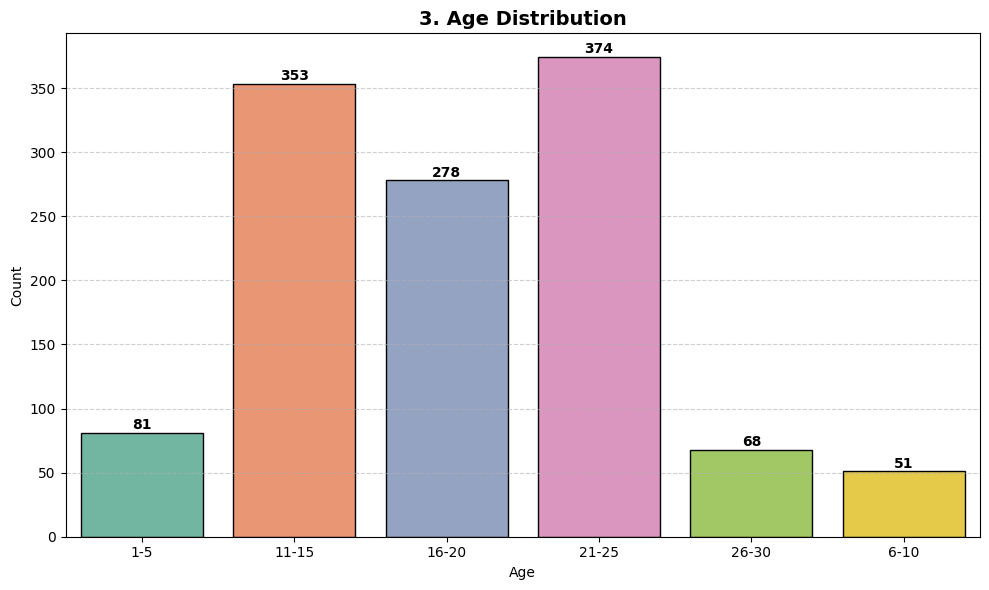

/tmp/ipython-input-13-1751213881.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




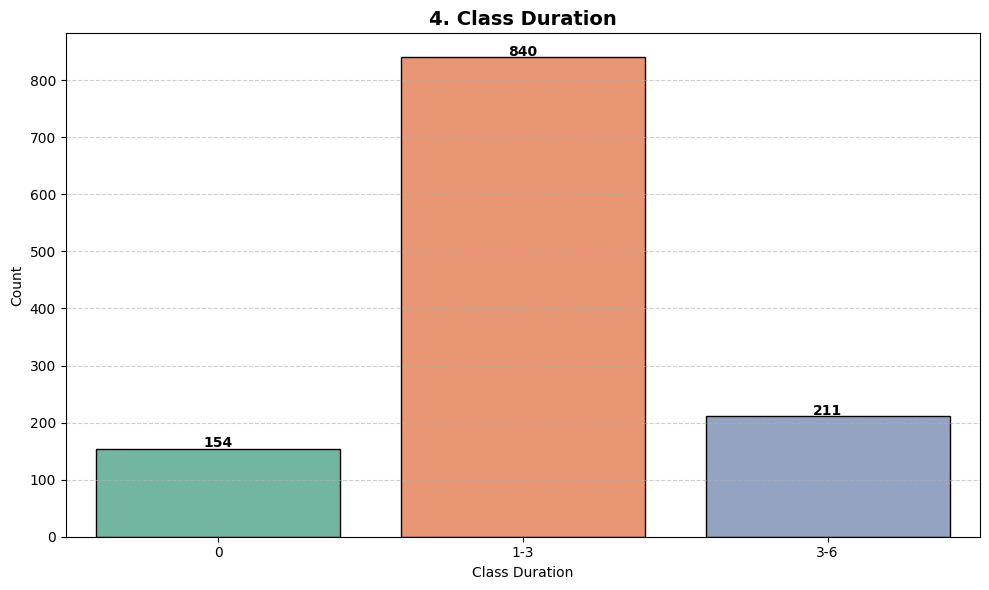

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def p_bar_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, palette='Set2', edgecolor='black')

    for i, v in enumerate(y):
        plt.text(i, v + 3, str(v), ha='center', fontweight='bold')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

age = df['Age'].value_counts().sort_index()
class_duration = df['Class Duration'].value_counts().sort_index()

p_bar_plot(age.index, age.values, 'Age', 'Count', '3. Age Distribution')
p_bar_plot(class_duration.index, class_duration.values, 'Class Duration', 'Count', '4. Class Duration')


In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

series_2 = []
series_2_title = ['Education Level', 'Financial Condition', 'Network Type']

series_2.append(df['Education Level'].value_counts())
series_2.append(df['Financial Condition'].value_counts())
series_2.append(df['Network Type'].value_counts())

color_scheme = ['#76c7c0', '#f1c40f', '#f39c12', '#9ecae1']

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

for idx, series in enumerate(series_2):
    fig.add_trace(
        go.Pie(
            values=series.values,
            labels=series.index,
            marker=dict(colors=color_scheme),
            title=str(idx + 5) + ". " + series_2_title[idx]
        ),
        row=1,
        col=idx + 1
    )

fig.update_traces(
    textinfo="label+percent+value",
    textfont_size=13,
    marker=dict(line=dict(color="#10000e", width=0.2))
)

fig.show()


In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

series_3 = []
series_3_title = ['IT Student', 'Location', 'Self LMS']
series_3.append(df['IT Student'].value_counts())
series_3.append(df['Location'].value_counts())
series_3.append(df['Self Lms'].value_counts())

color_scheme = ['#76c7c0', '#f1c40f']

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

for idx, series in enumerate(series_3):
    fig.add_trace(
        go.Pie(
            values=series.values,
            labels=series.index,
            marker=dict(colors=color_scheme),
            title=str(idx + 8) + ". " + series_3_title[idx]
        ),
        row=1,
        col=idx + 1
    )

fig.update_traces(
    textinfo="label+percent+value",
    textfont_size=13,
    marker=dict(line=dict(color="#100000", width=0.2))
)

fig.show()


In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

series_4 = []
series_4_title = ['Load-shedding', 'Internet Type', 'Device']
series_4.append(df['Load-shedding'].value_counts())
series_4.append(df['Internet Type'].value_counts())
series_4.append(df['Device'].value_counts())

color_scheme = ['#76c7c0', '#f1c40f', '#f39c12', '#9ecae1', '#d2b4de']

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

for idx, series in enumerate(series_4):
    fig.add_trace(
        go.Pie(
            values=series.values,
            labels=series.index,
            marker=dict(colors=color_scheme),
            title=str(idx + 11) + ". " + series_4_title[idx]
        ),
        row=1,
        col=idx + 1
    )

fig.update_traces(
    textinfo="label+percent+value",
    textfont_size=13,
    marker=dict(line=dict(color="#100000", width=0.2))
)

fig.show()


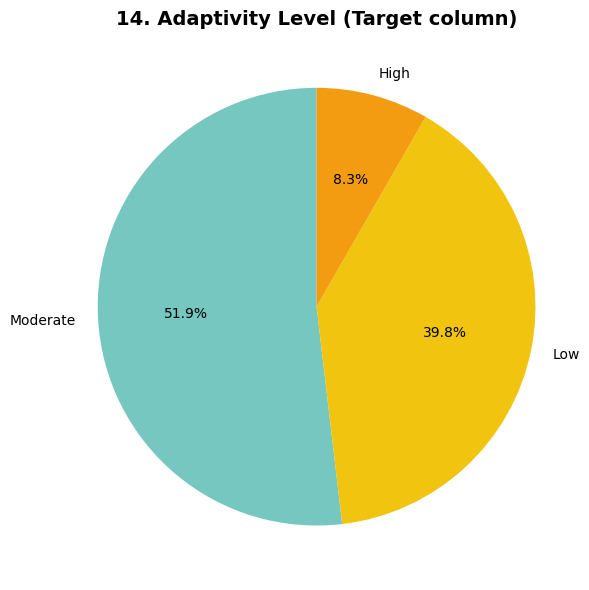

In [17]:
import matplotlib.pyplot as plt

def p_pie_plot(series, title):
    plt.figure(figsize=(6, 6))
    colors = ['#76c7c0', '#f1c40f', '#f39c12', '#d2b4de', '#9ecae1']
    plt.pie(series.values, labels=series.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

p_pie_plot(df['Adaptivity Level'].value_counts(), '14. Adaptivity Level (Target column)')


Multivariate Analysis

In [18]:
gender_age = df.groupby(['Gender', 'Age']).size()
fig = go.Figure(data=[
    go.Bar(name='Boy', x=gender_age['Boy'].index, y=gender_age['Boy'].values,
           text=gender_age['Boy'].values, marker_color='#5DADE2'),
    go.Bar(name='Girl', x=gender_age['Girl'].index, y=gender_age['Girl'].values,
           text=gender_age['Girl'].values, marker_color='#F7DC6F')
])

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Age Distribution by Gender',
                  template='simple_white')

fig.show()

In [19]:
gender_IT = df.groupby(['Gender', 'IT Student']).size()
fig = go.Figure(data=[
    go.Bar(name='Boy', x=gender_IT['Boy'].index, y=gender_IT['Boy'].values,
           text=gender_IT['Boy'].values, marker_color='#5DADE2'),
    go.Bar(name='Girl', x=gender_IT['Girl'].index, y=gender_IT['Girl'].values,
           text=gender_IT['Girl'].values, marker_color='#F7DC6F')
])

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Distribution of IT Students by Gender',
                  template='simple_white')

fig.update_traces(width=0.3)

fig.show()

In [20]:
Education_IT = df.groupby(['Education Level', 'IT Student']).size()
fig = go.Figure(data=[
    go.Bar(name='College', x=Education_IT['College'].index, y=Education_IT['College'].values,
           text=Education_IT['College'].values, marker_color='#5DADE2'),
    go.Bar(name='School', x=Education_IT['School'].index, y=Education_IT['School'].values,
           text=Education_IT['School'].values, marker_color='#F7DC6F'),
    go.Bar(name='University', x=Education_IT['University'].index, y=Education_IT['University'].values,
           text=Education_IT['University'].values, marker_color='#F1948A')
])

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Distribution of IT Students by Education Level',
                  template='simple_white')

fig.update_traces(width=0.2)

fig.show()

In [21]:
Gender_Adaptivity = df.groupby(['Gender', 'Adaptivity Level']).size()
fig = go.Figure(data=[
    go.Bar(name='Boy', x=Gender_Adaptivity['Boy'].index, y=Gender_Adaptivity['Boy'].values,
           text=Gender_Adaptivity['Boy'].values, marker_color='#5DADE2'),
    go.Bar(name='Girl', x=Gender_Adaptivity['Girl'].index, y=Gender_Adaptivity['Girl'].values,
           text=Gender_Adaptivity['Girl'].values, marker_color='#F7DC6F')
])

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Distribution of Gender by Adaptivity Level',
                  template='simple_white')

fig.update_traces(width=0.3)

fig.show()

In [22]:
Age_Adaptivity = df.groupby(['Age', 'Adaptivity Level']).size()
fig = go.Figure(data=[
    go.Bar(name='1-5', x=Age_Adaptivity['1-5'].index, y=Age_Adaptivity['1-5'].values,
           text=Age_Adaptivity['1-5'].values, marker_color='#5DADE2'),
    go.Bar(name='6-10', x=Age_Adaptivity['6-10'].index, y=Age_Adaptivity['6-10'].values,
           text=Age_Adaptivity['6-10'].values, marker_color='#F7DC6F'),
    go.Bar(name='11-15', x=Age_Adaptivity['11-15'].index, y=Age_Adaptivity['11-15'].values,
           text=Age_Adaptivity['11-15'].values, marker_color='#F1948A'),
    go.Bar(name='16-20', x=Age_Adaptivity['16-20'].index, y=Age_Adaptivity['16-20'].values,
           text=Age_Adaptivity['16-20'].values, marker_color='#D2B4DE'),
    go.Bar(name='21-25', x=Age_Adaptivity['21-25'].index, y=Age_Adaptivity['21-25'].values,
           text=Age_Adaptivity['21-25'].values, marker_color='#A9DFBF'),
    go.Bar(name='26-30', x=Age_Adaptivity['26-30'].index, y=Age_Adaptivity['26-30'].values,
           text=Age_Adaptivity['26-30'].values, marker_color='#AED6F1')
])

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Distribution of Age by Adaptivity Level',
                  template='simple_white')

fig.update_traces(width=0.1)

fig.show()

Pre-Processing

In [23]:
features = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location',
           'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type',
           'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']

columns = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location',
          'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type',
          'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']

print("Features:")
print(features)
print("Columns:")
print(columns)

Features:
['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']
Columns:
['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']


Encoding

In [24]:
import joblib
columns = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location',
          'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type',
          'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']

encoders = {}

for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

joblib.dump(encoders, 'encoders_dict.pkl')

['encoders_dict.pkl']

In [25]:
df.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


Test-Train Split

In [26]:
y=df['Adaptivity Level']
X= df.drop('Adaptivity Level', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 116)

In [27]:
print(colored('Shape of X_train: ', 'blue'), X_train.shape, '\n\n')
print(colored('Shape of X_test: ', 'red'), X_test.shape)

Shape of X_train:  (843, 13) 


Shape of X_test:  (362, 13)


Define Pre-Processing and Modelling Function

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

class CONFIG:
    FOLD = 5
    RANDOM_STATE = 116

    CLASSIFIERS = {
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
        "KNearest": KNeighborsClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=RANDOM_STATE),
        "XGBClassifier": XGBClassifier(random_state=RANDOM_STATE),
        "CatBoostClassifier": CatBoostClassifier(random_state=RANDOM_STATE, logging_level='Silent')
    }


    FEATURES = [
        'Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location',
        'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type',
        'Class Duration', 'Self Lms', 'Device'
    ]

    CB_BEST_PARAMS = {
        'iterations': 815,
        'depth': 5,
        'learning_rate': 0.08616774389778385,
        'random_strength': 45,
        'bagging_temperature': 0.23946457882908667,
        'od_type': 'Iter',
        'od_wait': 18,
        'logging_level': 'Silent',
        'random_state': RANDOM_STATE
    }

    XGB_BEST_PARAMS = {
        'n_estimators': 634,
        'max_depth': 15,
        'reg_alpha': 0,
        'reg_lambda': 3,
        'min_child_weight': 0,
        'gamma': 0,
        'learning_rate': 0.2616305059064822,
        'colsample_bytree': 0.65,
        'random_state': RANDOM_STATE
    }


In [29]:
def _scale(train_data, val_data, features):
    scaler = StandardScaler()

    scaled_train = scaler.fit_transform(train_data[features])
    scaled_val = scaler.transform(val_data[features])

    train = train_data.copy()
    val = val_data.copy()

    train[features] = scaled_train
    val[features] = scaled_val

    return train, val


In [30]:
def classifiers_modeling(classifiers, X_train, y_train_, X_test, y_test, features):
    accuracy_list = []
    classifiers_name = list(classifiers.keys())

    fold = KFold(n_splits=CONFIG.FOLD, random_state=CONFIG.RANDOM_STATE, shuffle=True)

    for idx, classifier in enumerate(classifiers.values()):
        accuracy = 0

        for fold_idx, (train_idx, val_idx) in enumerate(fold.split(X_train, y_train_)):
            x_train, x_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train, y_val = y_train_.iloc[train_idx], y_train_.iloc[val_idx]

            x_train, x_val = _scale(x_train, x_val, features)

            model = classifier.fit(x_train[features], y_train)
            val_preds = model.predict(x_val[features])

            accuracy += accuracy_score(y_val, val_preds) / CONFIG.FOLD

        accuracy_list.append(round(accuracy, 5))

        print(f"({idx+1}) {classifiers_name[idx]} cross validation (5 fold)")
        print("Mean Accuracy Score:", round(accuracy, 5))
        print("Mean Accuracy Score:", colored(round(accuracy, 5), 'green'))

    return accuracy_list

In [31]:

def p_bar_plot(x, y, width, x_axis_title, y_axis_title, title):
    fig = px.bar(
        x=x,
        y=y,
        color=x,
        text=y,
        color_discrete_sequence=color_scheme,
        template='simple_white'
    )

    fig.update_layout(
        xaxis_title=x_axis_title,
        yaxis_title=y_axis_title,
        title=title,
        font=dict(size=17, family="Franklin Gothic")
    )

    fig.update_traces(width=width)
    fig.show()


Model Comparison (part -1)

In [32]:
classifiers_name = list(CONFIG.CLASSIFIERS.keys())
classifiers_accuracy = []

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

classifiers_accuracy = classifiers_modeling(CONFIG.CLASSIFIERS, X_train, y_train, X_test, y_test, CONFIG.FEATURES)


(1) LogisticRegression cross validation (5 fold)
Mean Accuracy Score: 0.68809
Mean Accuracy Score: 0.68809
(2) KNearest cross validation (5 fold)
Mean Accuracy Score: 0.77112
Mean Accuracy Score: 0.77112
(3) RandomForestClassifier cross validation (5 fold)
Mean Accuracy Score: 0.89568
Mean Accuracy Score: 0.89568
(4) XGBClassifier cross validation (5 fold)
Mean Accuracy Score: 0.89094
Mean Accuracy Score: 0.89094
(5) CatBoostClassifier cross validation (5 fold)
Mean Accuracy Score: 0.88619
Mean Accuracy Score: 0.88619


In [34]:
p_bar_plot(
    x=classifiers_name,
    y=np.round(classifiers_accuracy, 3),
    width=0.5,
    x_axis_title='Classifiers',
    y_axis_title='Classifiers Accuracy Score',
    title='Classifiers Accuracy Score (Cross Validated: 5 Fold)'
)

In [35]:
def cb_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'logging_level': 'Silent',
        'random_state': CONFIG.RANDOM_STATE
    }

    accuracy = 0
    cb_model = CatBoostClassifier(**params)

    # 5-Fold Cross Validation
    fold = KFold(n_splits=CONFIG.FOLD, random_state=CONFIG.RANDOM_STATE, shuffle=True)

    for fold_idx, (train_idx, val_idx) in enumerate(fold.split(X_train, y_train)):
        x_train_fold, x_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        x_train_fold, x_val_fold = _scale(x_train_fold, x_val_fold, CONFIG.FEATURES)

        cb_model.fit(x_train_fold[CONFIG.FEATURES], y_train_fold)
        val_preds = cb_model.predict(x_val_fold[CONFIG.FEATURES])
        accuracy += accuracy_score(y_val_fold, val_preds) / CONFIG.FOLD

    return accuracy

cb_study = optuna.create_study(direction="maximize")
cb_study.optimize(cb_objective, n_trials=50, timeout=600)

[I 2025-06-19 18:26:40,249] A new study created in memory with name: no-name-dbf6721e-dbdc-465a-b07b-9278dedca095
/tmp/ipython-input-35-2348335581.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipython-input-35-2348335581.py:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2025-06-19 18:27:01,587] Trial 0 finished with value: 0.888560157790927 and parameters: {'iterations': 727, 'depth': 9, 'learning_rate': 0.12891651262763576, 'random_strength': 26, 'bagging_temperature': 0.8717337592838783, 'od_type': 'IncToDec', 'od_wait': 16}. Best is trial 0 with value: 0.888560157790927.
/tmp/ipython-input-35-2348335581.py:5: FutureWarning:

suggest_loguniform has bee

In [36]:
Times = 5
y_train_ = y_train
def xgb_objective(trial):

     param = {
             "n_estimators" : trial.suggest_int('n_estimators', 0, 1000),
             'max_depth':trial.suggest_int('max_depth', 2, 25),
             'reg_alpha':trial.suggest_int('reg_alpha', 0, 5),
             'reg_lambda':trial.suggest_int('reg_lambda', 0, 5),
             'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
             'gamma':trial.suggest_int('gamma', 0, 5),
             'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
             'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
             'nthread' : -1
             }
     # Get Accuracy
     accuracy = 0
     # Create Model
     xgb_model = XGBClassifier(**param)
     # 5 Fold
     fold = KFold(n_splits = CONFIG.FOLD, random_state = CONFIG.RANDOM_STATE, shuffle=True)
     for fold_idx, (train_idx, val_idx) in enumerate(fold.split(X_train, y_train_)):
         x_train, x_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
         x_train, x_val = _scale(x_train, x_val, CONFIG.FEATURES)
         y_train, y_val = y_train_.iloc[train_idx], y_train_.iloc[val_idx]
         model = xgb_model.fit(x_train[CONFIG.FEATURES], y_train)
         val_preds = model.predict(x_val[CONFIG.FEATURES])

         accuracy += accuracy_score(y_val, val_preds) / CONFIG.FOLD
     return accuracy

xgb_study = optuna.create_study(direction="maximize")
xgb_study.optimize(xgb_objective, n_trials=120, timeout=600)

[I 2025-06-19 18:34:00,310] A new study created in memory with name: no-name-5d90674b-9852-4f7a-a820-75a2d75ef5bf
/tmp/ipython-input-36-2525608236.py:12: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipython-input-36-2525608236.py:13: FutureWarning:

suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.

[I 2025-06-19 18:34:02,649] Trial 0 finished with value: 0.7556353902507749 and parameters: {'n_estimators': 997, 'max_depth': 19, 'reg_alpha': 5, 'reg_lambda': 3, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.013635975710535087, 'colsample_bytree': 0.32}. Best is trial 0 with value: 0.7556353902507749.
/tmp/ipython-input-36-2525608236.py:12: FutureWarning:

suggest_logunifor

In [37]:
tuned_classifiers = {
    "CatBoostClassifier": CatBoostClassifier(**CONFIG.CB_BEST_PARAMS),
    "XGBClassifier": XGBClassifier(**CONFIG.XGB_BEST_PARAMS)
}

In [38]:
classifiers_name.append('Tuned_CatBoostClassifier')
classifiers_name.append('Tuned_XGBClassifier')
tuned_accuracy = classifiers_modeling(tuned_classifiers, X_train, y_train, X_test, y_test, CONFIG.FEATURES)

for tuned_accuracy_score in tuned_accuracy:
    classifiers_accuracy.append(tuned_accuracy_score)

(1) CatBoostClassifier cross validation (5 fold)
Mean Accuracy Score: 0.89806
Mean Accuracy Score: 0.89806
(2) XGBClassifier cross validation (5 fold)
Mean Accuracy Score: 0.89567
Mean Accuracy Score: 0.89567


In [39]:

unique_classifiers = {}
for name, acc in zip(classifiers_name, classifiers_accuracy):
    if name not in unique_classifiers:
        unique_classifiers[name] = acc

classifiers_name = list(unique_classifiers.keys())
classifiers_accuracy = list(unique_classifiers.values())


In [40]:
p_bar_plot(x = classifiers_name,
           y = np.round(classifiers_accuracy,3),
           width = 0.6,
           x_axis_title = 'Classifiers',
           y_axis_title = 'Classifiers Accuracy',
           title = 'Comparison of each Classifiers Accuracy Score (Fold=5, Tuned Model Added) ')

Accuracy: 0.8922651933701657
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        28
           1       0.86      0.94      0.90       142
           2       0.91      0.92      0.91       192

    accuracy                           0.89       362
   macro avg       0.92      0.78      0.83       362
weighted avg       0.90      0.89      0.89       362



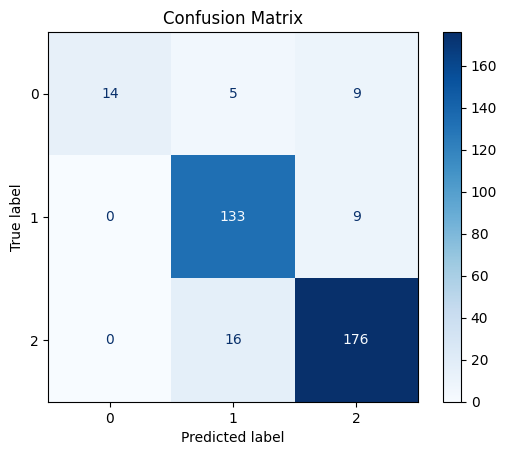

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
model1 = XGBClassifier(**CONFIG.XGB_BEST_PARAMS)
model1.fit(X_train[CONFIG.FEATURES], y_train)
predictions1 = model1.predict(X_test[CONFIG.FEATURES])
accuracy = accuracy_score(y_test, predictions1)
class_report = classification_report(y_test, predictions1)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)
results = {
    'predictions': predictions1,
    'accuracy': accuracy,
    'classification_report': class_report
}
cm = confusion_matrix(y_test, predictions1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.9060773480662984
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        28
           1       0.88      0.95      0.92       142
           2       0.92      0.93      0.93       192

    accuracy                           0.91       362
   macro avg       0.93      0.79      0.84       362
weighted avg       0.91      0.91      0.90       362



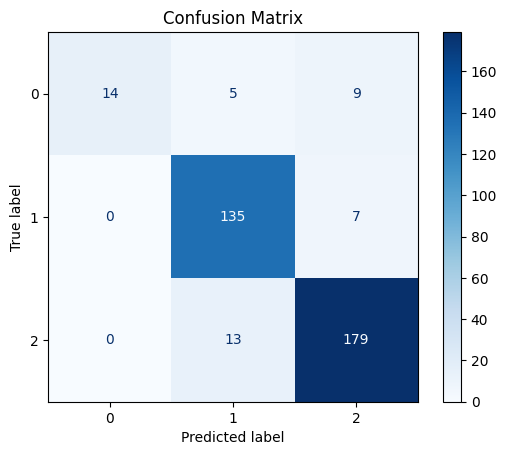

In [42]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
model2 = CatBoostClassifier(**CONFIG.CB_BEST_PARAMS)
model2.fit(X_train[CONFIG.FEATURES], y_train)
predictions = model2.predict(X_test[CONFIG.FEATURES])
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)
results = {
    'predictions': predictions,
    'accuracy': accuracy,
    'classification_report': class_report
}
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.9005524861878453
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        28
           1       0.88      0.94      0.91       142
           2       0.91      0.93      0.92       192

    accuracy                           0.90       362
   macro avg       0.93      0.79      0.83       362
weighted avg       0.90      0.90      0.90       362



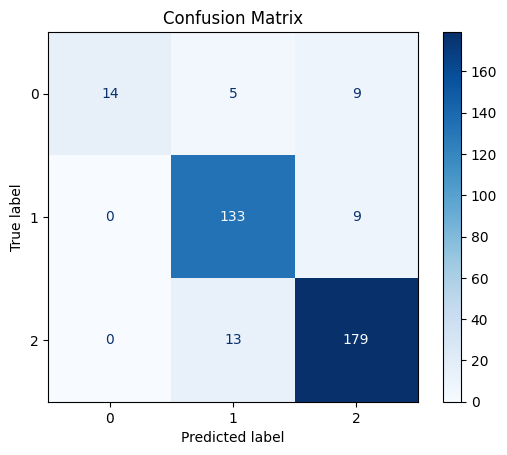

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train[CONFIG.FEATURES], y_train)
predictions3 = model3.predict(X_test[CONFIG.FEATURES])
accuracy = accuracy_score(y_test, predictions3)
class_report = classification_report(y_test, predictions3)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)
results = {
    'predictions': predictions3,
    'accuracy': accuracy,
    'classification_report': class_report
}
cm = confusion_matrix(y_test, predictions3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7955801104972375
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.21      0.33        28
           1       0.77      0.87      0.81       142
           2       0.82      0.83      0.82       192

    accuracy                           0.80       362
   macro avg       0.78      0.64      0.66       362
weighted avg       0.79      0.80      0.78       362



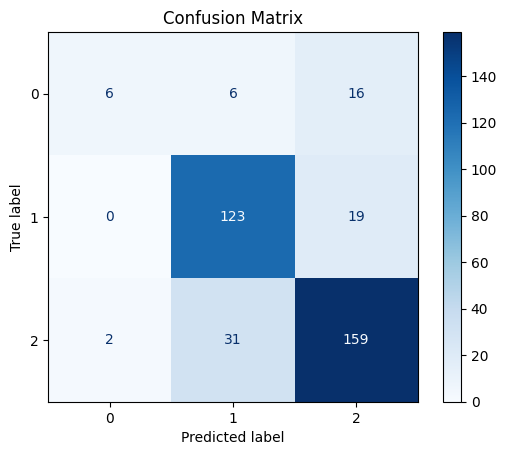

In [44]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

CONFIG.KNN_BEST_PARAMS = {
    'n_neighbors': 5,
    'weights': 'uniform',
    'algorithm': 'auto'
}


from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier(**CONFIG.KNN_BEST_PARAMS)
model4.fit(X_train[CONFIG.FEATURES], y_train)

predictions4 = model4.predict(X_test[CONFIG.FEATURES])

accuracy = accuracy_score(y_test, predictions4)
class_report = classification_report(y_test, predictions4)

print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)

results = {
    'predictions': predictions4,
    'accuracy': accuracy,
    'classification_report': class_report
}

cm = confusion_matrix(y_test, predictions4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model4.classes_)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.643646408839779
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.18      0.27        28
           1       0.62      0.58      0.60       142
           2       0.66      0.76      0.71       192

    accuracy                           0.64       362
   macro avg       0.61      0.51      0.53       362
weighted avg       0.64      0.64      0.63       362



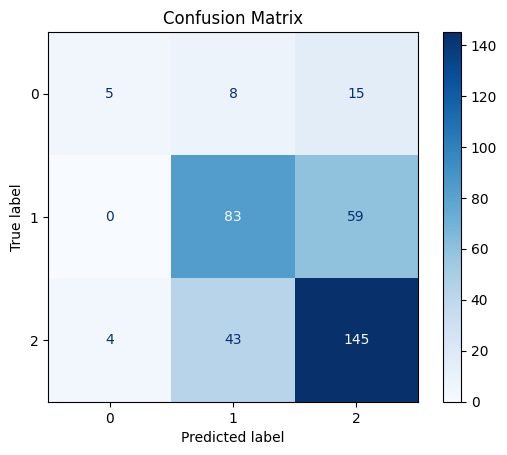

In [45]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

CONFIG.LOGREG_BEST_PARAMS = {
    'penalty': 'l2',
    'C': 1.0,
    'solver': 'lbfgs',
    'max_iter': 1000,
    'random_state': CONFIG.RANDOM_STATE
}

model5 = LogisticRegression(**CONFIG.LOGREG_BEST_PARAMS)
model5.fit(X_train[CONFIG.FEATURES], y_train)

predictions5 = model5.predict(X_test[CONFIG.FEATURES])

accuracy = accuracy_score(y_test, predictions5)
class_report = classification_report(y_test, predictions5)

print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)

results = {
    'predictions': predictions5,
    'accuracy': accuracy,
    'classification_report': class_report
}

cm = confusion_matrix(y_test, predictions5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model5.classes_)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


               Variable  Variable Importance
10       Class Duration            11.465912
0                Gender            11.158527
7   Financial Condition            11.113674
1                   Age            10.216659
2       Education Level             9.182005
9          Network Type             8.813280
8         Internet Type             7.511637
3      Institution Type             7.230960
12               Device             5.486979
5              Location             4.915748
11             Self Lms             4.706302
4            IT Student             4.469861
6         Load-shedding             3.728456


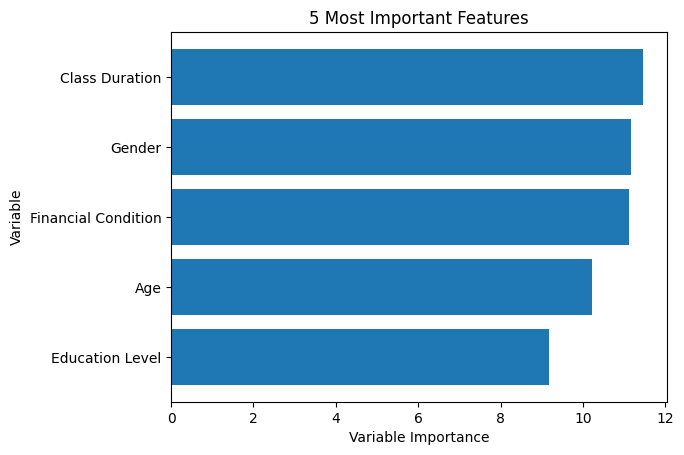

In [46]:
feature_importances = model2.feature_importances_
feature_importances_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Variable Importance': feature_importances
})
feature_importances_df = feature_importances_df.sort_values('Variable Importance', ascending=False)
print(feature_importances_df)
top_features = feature_importances_df.nlargest(5, 'Variable Importance')
plt.barh(top_features['Variable'], top_features['Variable Importance'])
plt.title("5 Most Important Features")
plt.xlabel("Variable Importance")
plt.ylabel("Variable")
plt.gca().invert_yaxis()
plt.show()

In [47]:
import joblib
joblib.dump(model2, 'catboost_model.pkl')


['catboost_model.pkl']

In [48]:
import joblib

model = joblib.load('catboost_model.pkl')

predictions = model.predict(X_test[CONFIG.FEATURES])
